In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Загружаем данные из CSV-файла
data = pd.read_csv('data.csv')

In [46]:
# Добавил игнорирование первого столбца, так как в нем хранится время прохождения опроса, которое не надо анализировать
data = data.iloc[:, 1:]

In [47]:
# Функция для анализа вопросов с одним вариантом ответа
def analyze_single_choice(responses, title):
    # Подсчитываем частоту каждого ответа
    counts = responses.value_counts()
    print(f"\nАнализ вопроса: {title}")
    print(counts)

    # Визуализация
    plt.figure(figsize=(8, 6))
    sns.barplot(x=counts.values, y=counts.index, palette='viridis')
    plt.title(title)
    plt.xlabel('Количество ответов')
    plt.ylabel('Варианты ответов')
    plt.show()

In [48]:
# Функция для анализа вопросов с множественным выбором
def analyze_multiple_choice(responses, title):
    # Разделяем ответы по точке с запятой и создаем список всех ответов
    all_responses = responses.dropna().str.split(';').explode()
    
    # Подсчитываем частоту каждого ответа
    counts = all_responses.value_counts()
    print(f"\nАнализ вопроса: {title}")
    print(counts)

    # Визуализация
    plt.figure(figsize=(8, 6))
    sns.barplot(x=counts.values, y=counts.index, palette='viridis')
    plt.title(title)
    plt.xlabel('Количество ответов')
    plt.ylabel('Варианты ответов')
    plt.show()

In [49]:
# Функция для анализа вопросов с шкалой
def analyze_scale_question(responses, title):
    mean_value = responses.mean()
    distribution = responses.value_counts().sort_index()
    print(f"\nАнализ вопроса: {title}")
    print(f"Среднее значение: {mean_value:.2f}")
    print(distribution)

    plt.figure(figsize=(8, 6))
    sns.countplot(x=responses, palette='coolwarm', order=sorted(responses.unique()))
    plt.title(title)
    plt.xlabel('Оценка')
    plt.ylabel('Количество ответов')
    plt.show()


In [51]:
# Функция для автоматического анализа всех вопросов
def analyze_all_questions(data):
    for column in data.columns:
        print(f"\n=== Анализ вопроса: {column} ===")
        
        # Определяем тип вопроса
        if data[column].dtype == 'object':  # Если данные текстовые
            # Проверяем, есть ли разделители (точка с запятой) для множественного выбора
            if data[column].dropna().str.contains(';').any():
                analyze_multiple_choice(data[column], column)
            else:
                # Если текстовые данные без разделителей, считаем это вопросом с одним вариантом ответа
                analyze_single_choice(data[column], column)
        elif pd.api.types.is_numeric_dtype(data[column]):  # Если данные числовые
            analyze_scale_question(data[column], column)
        else:
            print("Неизвестный тип данных для анализа.")


=== Анализ вопроса: Какой у вас уровень опыта в разработке микросервисных архитектур?
 ===

Анализ вопроса: Какой у вас уровень опыта в разработке микросервисных архитектур?

Какой у вас уровень опыта в разработке микросервисных архитектур?\n
Начинающий (менее 1 года)    4
Опытный (1-3 года)           1
Name: count, dtype: int64


C:\Users\rusla\AppData\Local\Temp\ipykernel_22364\1396633115.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette='viridis')


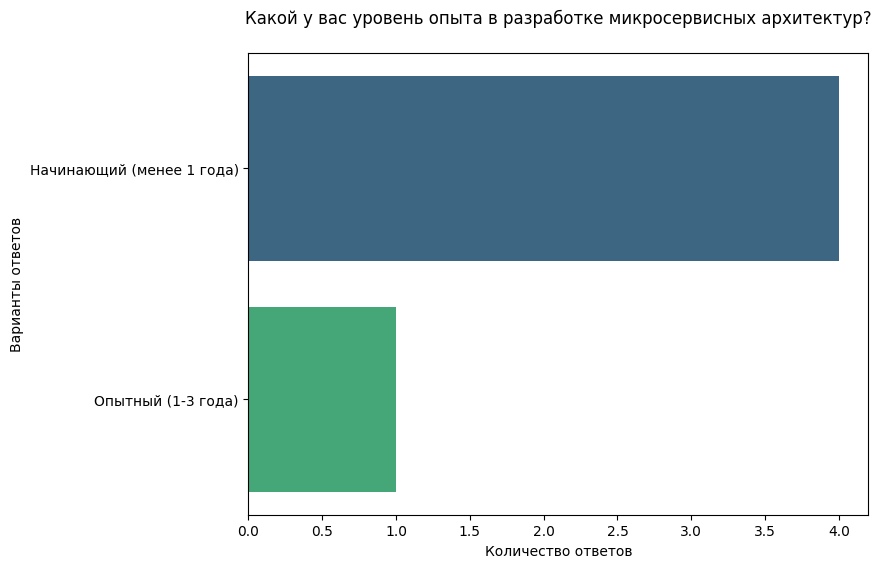


=== Анализ вопроса: Какие преимущества микросервисной архитектуры вы считаете наиболее важными?  ===

Анализ вопроса: Какие преимущества микросервисной архитектуры вы считаете наиболее важными? 
Какие преимущества микросервисной архитектуры вы считаете наиболее важными? 
Гибкость разработки          4
Упрощенное тестирование      3
Масштабируемость             3
Независимое развертывание    3
Name: count, dtype: int64


C:\Users\rusla\AppData\Local\Temp\ipykernel_22364\1065368906.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette='viridis')


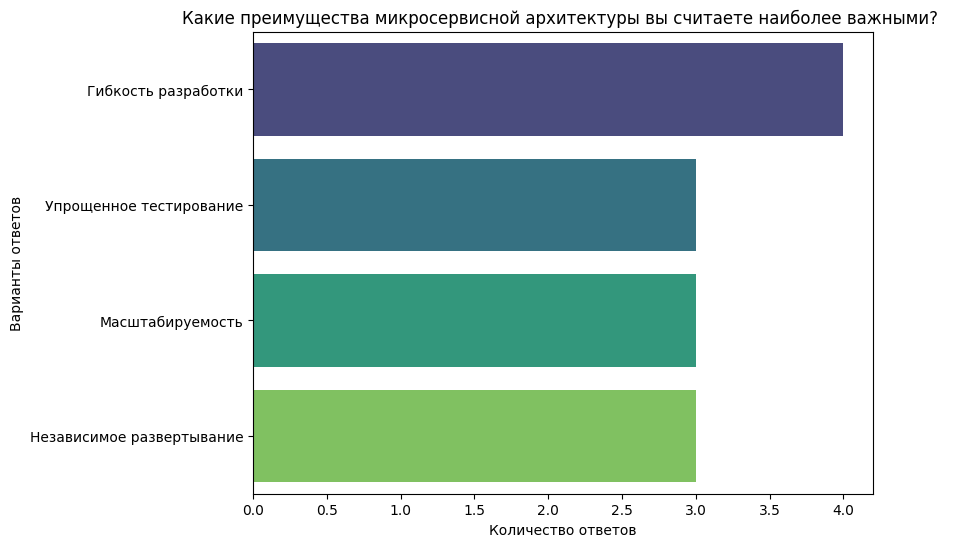


=== Анализ вопроса: Какие инструменты или фреймворки вы используете для создания микросервисов? ===

Анализ вопроса: Какие инструменты или фреймворки вы используете для создания микросервисов?
Какие инструменты или фреймворки вы используете для создания микросервисов?
Node.js          4
Flask/FastAPI    4
.NET Core        3
Spring Boot      1
Name: count, dtype: int64


C:\Users\rusla\AppData\Local\Temp\ipykernel_22364\1065368906.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette='viridis')


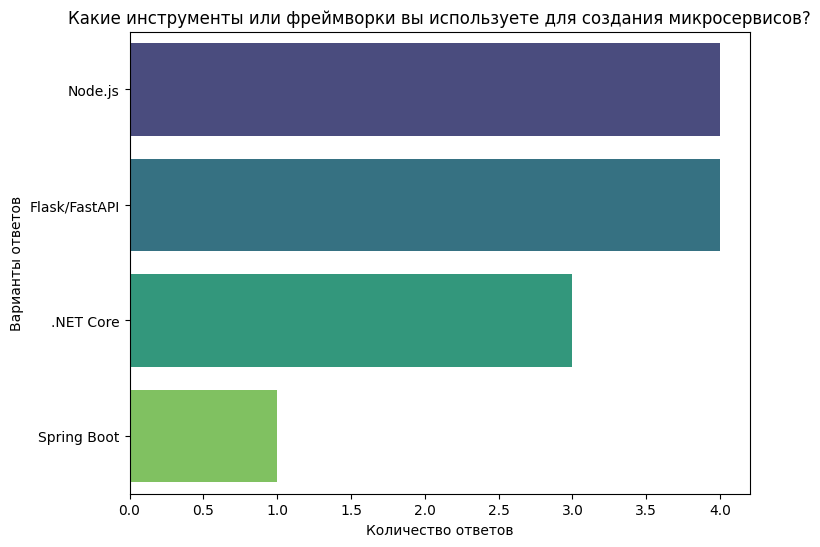


=== Анализ вопроса: Какую базу данных вы предпочитаете использовать в микросервисах? ===

Анализ вопроса: Какую базу данных вы предпочитаете использовать в микросервисах?
Какую базу данных вы предпочитаете использовать в микросервисах?
Реляционные (PostgreSQL, MySQL)    3
NoSQL (MongoDB, Cassandra)         2
Зависит от задачи                  2
Гибридный подход                   1
Name: count, dtype: int64


C:\Users\rusla\AppData\Local\Temp\ipykernel_22364\1065368906.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette='viridis')


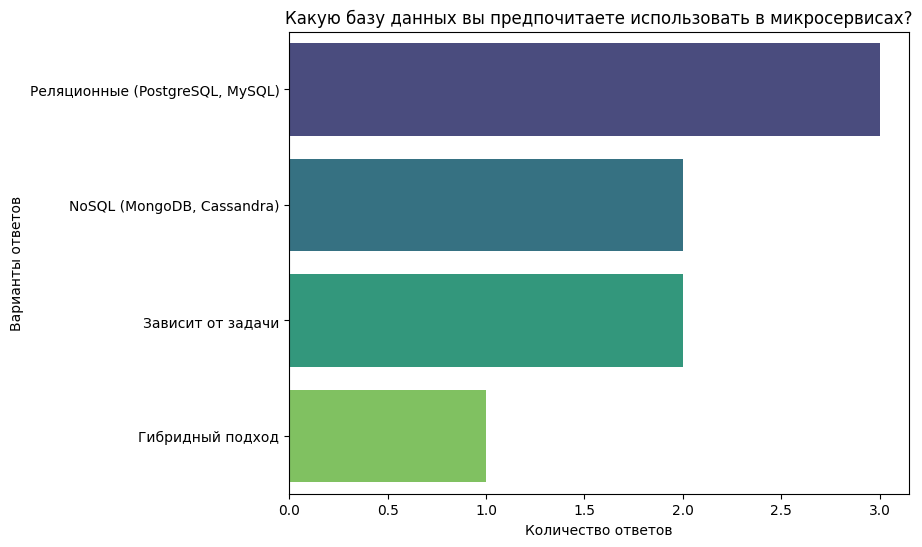


=== Анализ вопроса: Насколько важно, чтобы микросервисы были автономными? ===

Анализ вопроса: Насколько важно, чтобы микросервисы были автономными?
Среднее значение: 4.00
Насколько важно, чтобы микросервисы были автономными?
3    1
4    3
5    1
Name: count, dtype: int64


C:\Users\rusla\AppData\Local\Temp\ipykernel_22364\2333985531.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=responses, palette='coolwarm', order=sorted(responses.unique()))


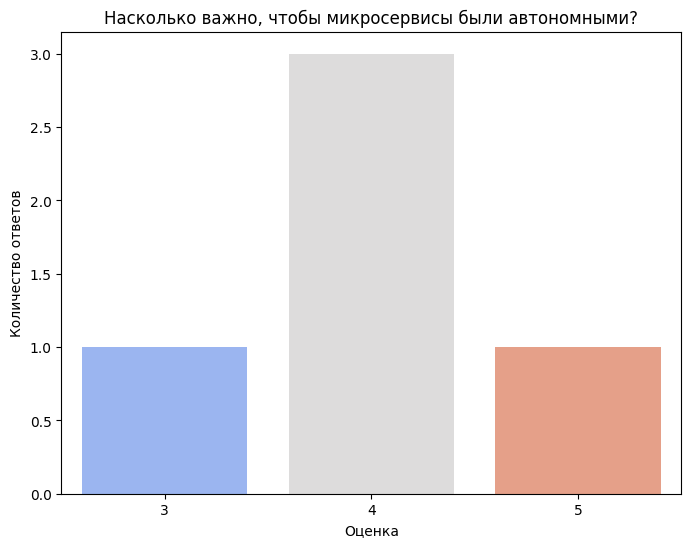


=== Анализ вопроса: Как вы решаете проблему согласованности данных между микросервисами? ===

Анализ вопроса: Как вы решаете проблему согласованности данных между микросервисами?
Как вы решаете проблему согласованности данных между микросервисами?
Использую распределенные транзакции с помощью паттерна Saga для координации действий между сервисами.    2
Пока не сталкивался с этой проблемой, но планирую изучить подходы, такие как CQRS                        2
Использую базу данных для каждого сервиса и периодически выполняю синхронизацию через API.               1
Применяю event sourcing для отслеживания изменений в данных и обеспечения их согласованности             1
Синхронизирую данные через общее хранилище (например, Kafka) и обрабатываю события асинхронно.           1
Name: count, dtype: int64


C:\Users\rusla\AppData\Local\Temp\ipykernel_22364\1065368906.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette='viridis')


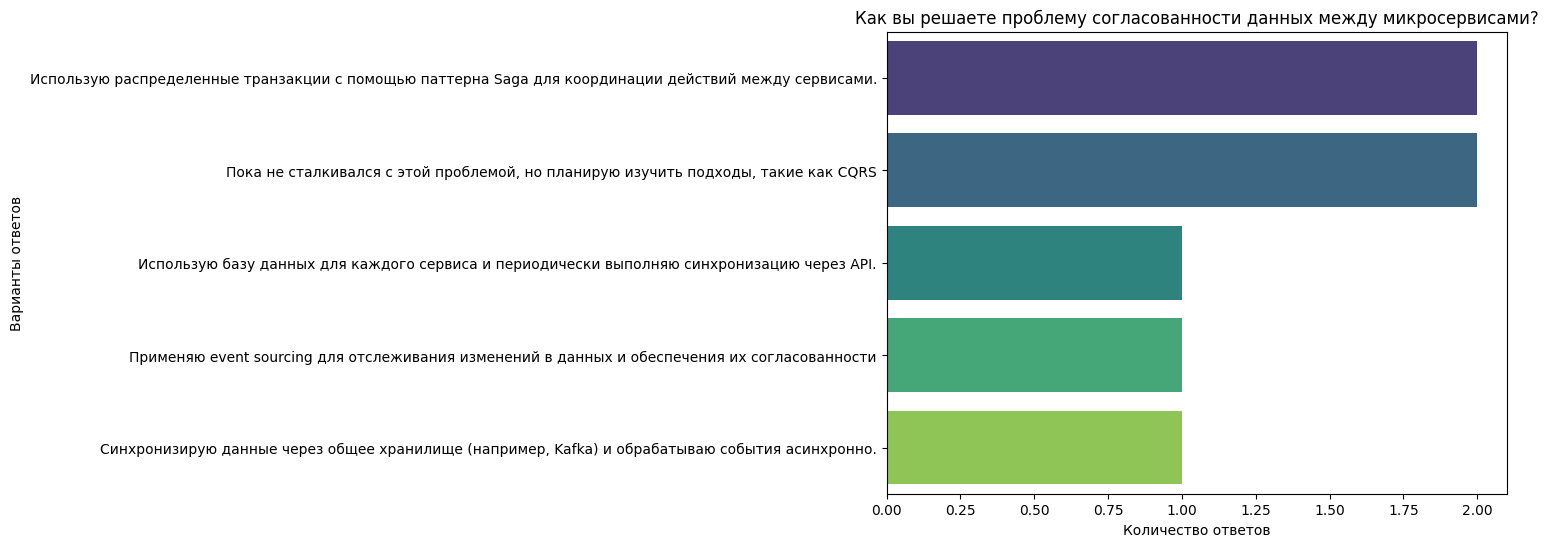


=== Анализ вопроса: Используете ли вы event-driven архитектуру в своих микросервисах? ===

Анализ вопроса: Используете ли вы event-driven архитектуру в своих микросервисах?
Используете ли вы event-driven архитектуру в своих микросервисах?
Планирую внедрить    3
Да                   2
Name: count, dtype: int64


C:\Users\rusla\AppData\Local\Temp\ipykernel_22364\1396633115.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette='viridis')


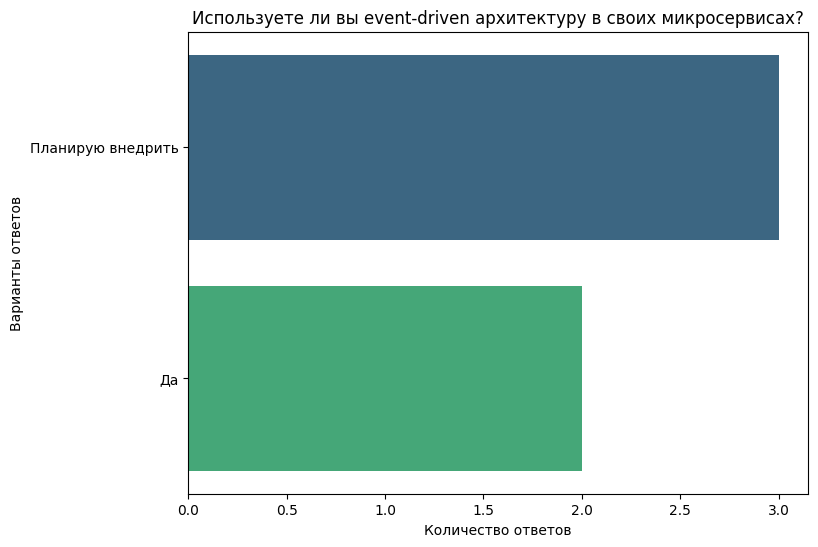


=== Анализ вопроса: Какие инструменты для оркестрации микросервисов вы используете? ===

Анализ вопроса: Какие инструменты для оркестрации микросервисов вы используете?
Какие инструменты для оркестрации микросервисов вы используете?
Kubernetes      5
Docker Swarm    3
Name: count, dtype: int64


C:\Users\rusla\AppData\Local\Temp\ipykernel_22364\1065368906.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette='viridis')


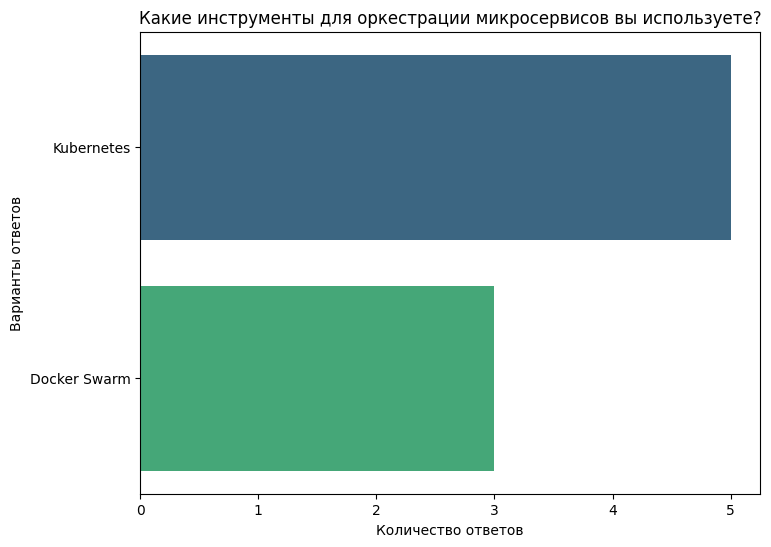


=== Анализ вопроса: Как часто вы сталкиваетесь с проблемами производительности в микросервисах? ===

Анализ вопроса: Как часто вы сталкиваетесь с проблемами производительности в микросервисах?
Среднее значение: 2.20
Как часто вы сталкиваетесь с проблемами производительности в микросервисах?
1    2
2    2
5    1
Name: count, dtype: int64


C:\Users\rusla\AppData\Local\Temp\ipykernel_22364\2333985531.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=responses, palette='coolwarm', order=sorted(responses.unique()))


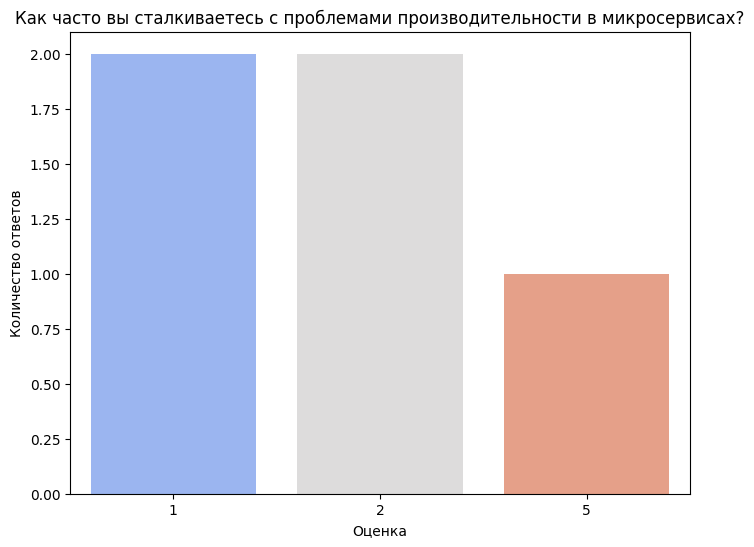


=== Анализ вопроса: Как вы мониторите и логируете работу микросервисов? ===

Анализ вопроса: Как вы мониторите и логируете работу микросервисов?
Как вы мониторите и логируете работу микросервисов?
Prometheus + Grafana                           4
ELK Stack (Elasticsearch, Logstash, Kibana)    1
Splunk                                         1
Name: count, dtype: int64


C:\Users\rusla\AppData\Local\Temp\ipykernel_22364\1065368906.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette='viridis')


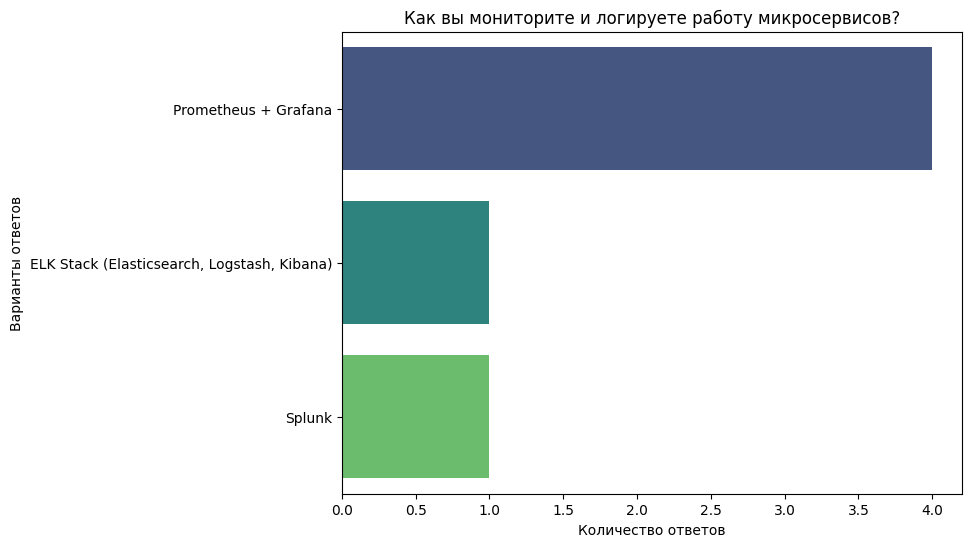

C:\Users\rusla\AppData\Local\Temp\ipykernel_22364\1396633115.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette='viridis')



=== Анализ вопроса: Какие методы защиты данных вы применяете в микросервисах? ===

Анализ вопроса: Какие методы защиты данных вы применяете в микросервисах?
Какие методы защиты данных вы применяете в микросервисах?
Аутентификация/Авторизация (OAuth, JWT)    4
Сегментация сети                           1
Name: count, dtype: int64


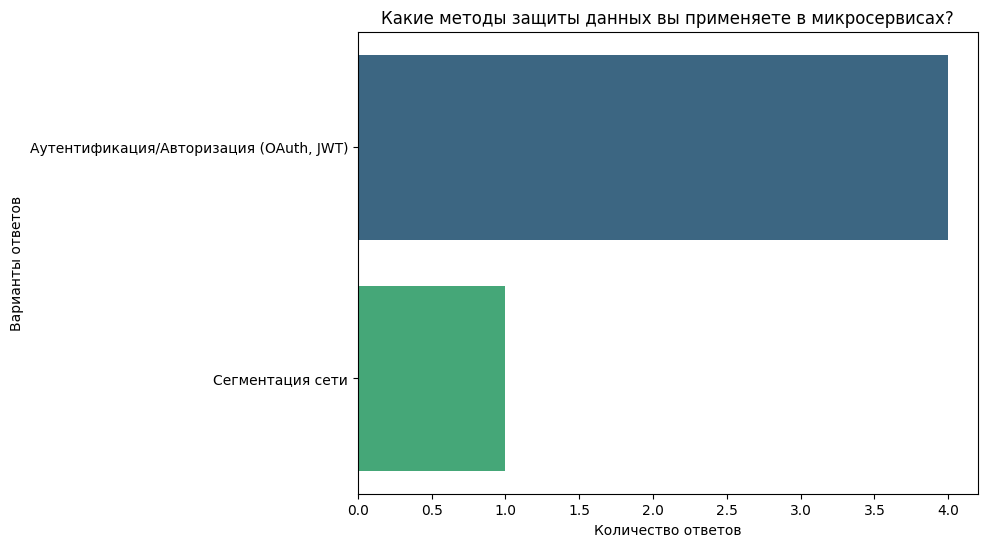


=== Анализ вопроса: Как вы оцениваете сложность перехода с монолитной архитектуры на микросервисы? ===

Анализ вопроса: Как вы оцениваете сложность перехода с монолитной архитектуры на микросервисы?
Среднее значение: 3.40
Как вы оцениваете сложность перехода с монолитной архитектуры на микросервисы?
3    4
5    1
Name: count, dtype: int64


C:\Users\rusla\AppData\Local\Temp\ipykernel_22364\2333985531.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=responses, palette='coolwarm', order=sorted(responses.unique()))


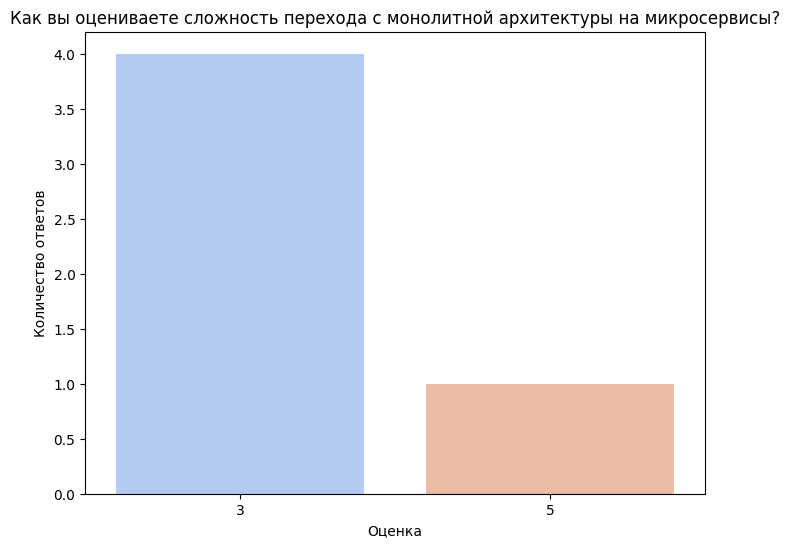


=== Анализ вопроса: Какие основные вызовы вы видите при работе с микросервисами? ===

Анализ вопроса: Какие основные вызовы вы видите при работе с микросервисами?
Какие основные вызовы вы видите при работе с микросервисами?
Увеличение времени развертывания новых версий из-за большого количества зависимостей           4
Необходимость постоянного обучения команды новым технологиям и подходам.                       3
Очень сложно поддерживать согласованность данных между сервисами, особенно в случае отказов    2
Сложность тестирования системы в целом, особенно при интеграции нескольких сервисов.           2
Рост сложности мониторинга и логирования, так как система становится более распределенной.     1
Name: count, dtype: int64


C:\Users\rusla\AppData\Local\Temp\ipykernel_22364\1065368906.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette='viridis')


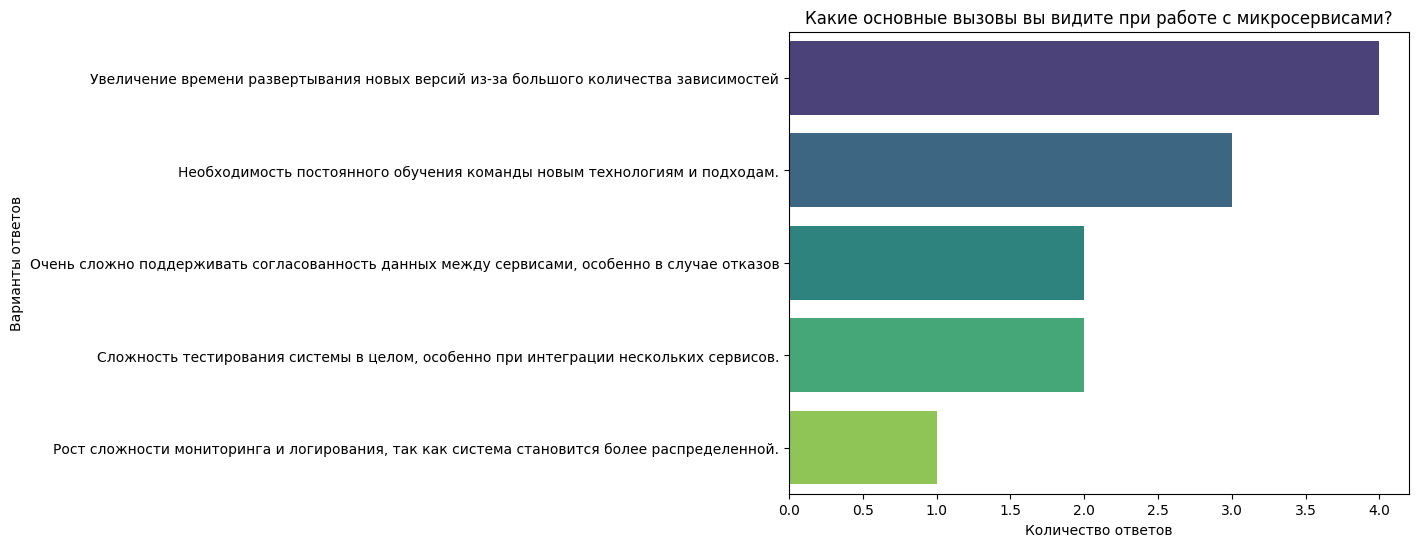


=== Анализ вопроса: Какие дополнительные технологии или практики вы хотели бы изучить для работы с микросервисами? ===

Анализ вопроса: Какие дополнительные технологии или практики вы хотели бы изучить для работы с микросервисами?
Какие дополнительные технологии или практики вы хотели бы изучить для работы с микросервисами?
Планирую углубиться в event-driven архитектуру и Kafka Streams для обработки событий.         5
Интересуюсь Service Mesh (например, Istio) для управления взаимодействием между сервисами.    3
Хочу изучить Kubernetes для оркестрации контейнеров и автоматизации развертывания.            3
Хотел бы научиться эффективно использовать Prometheus и Grafana для мониторинга.              2
Изучаю подходы к проектированию отказоустойчивых систем, такие как Circuit Breaker.           1
Name: count, dtype: int64


C:\Users\rusla\AppData\Local\Temp\ipykernel_22364\1065368906.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette='viridis')


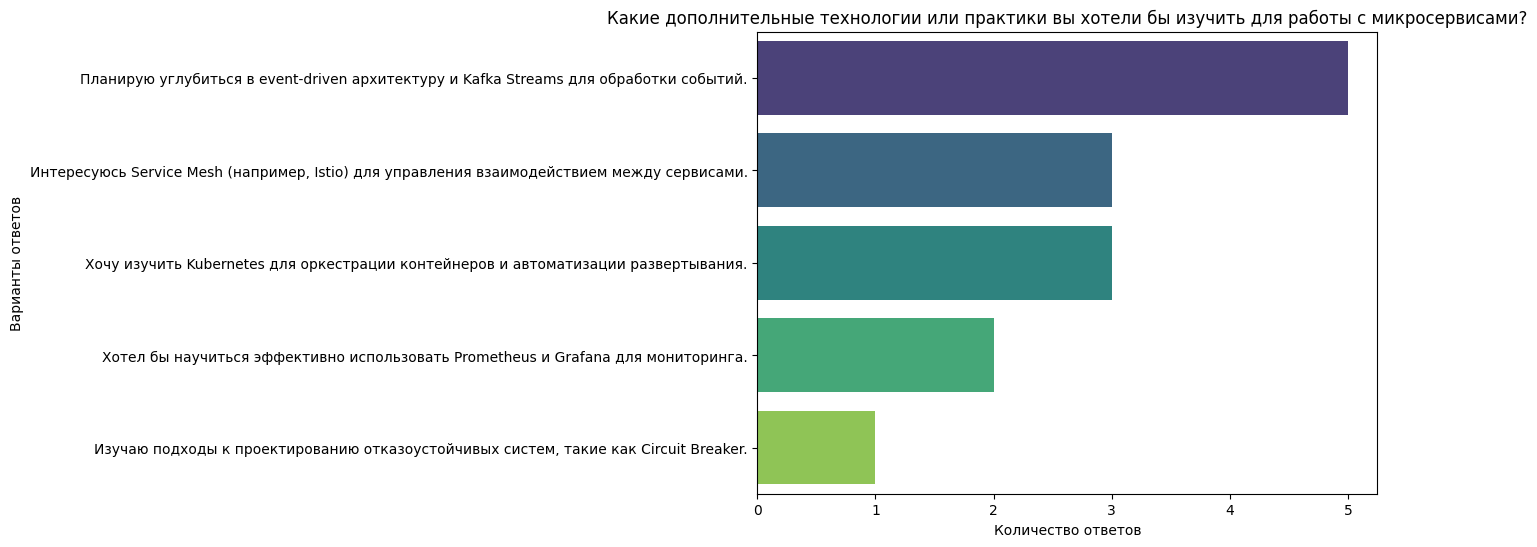


=== Анализ вопроса: Что вы считаете ключевым фактором успеха микросервисной архитектуры? ===

Анализ вопроса: Что вы считаете ключевым фактором успеха микросервисной архитектуры?
Что вы считаете ключевым фактором успеха микросервисной архитектуры?
Культура DevOps и автоматизация процессов развертывания и тестирования.                     5
Использование стандартных протоколов и форматов данных (например, REST, gRPC, JSON).        3
Надежная система мониторинга и логирования для быстрого выявления проблем.                  2
Правильное разделение сервисов на автономные компоненты с четко определенными границами.    2
Гибкость в выборе технологий для каждого сервиса в зависимости от задач.                    1
Name: count, dtype: int64


C:\Users\rusla\AppData\Local\Temp\ipykernel_22364\1065368906.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette='viridis')


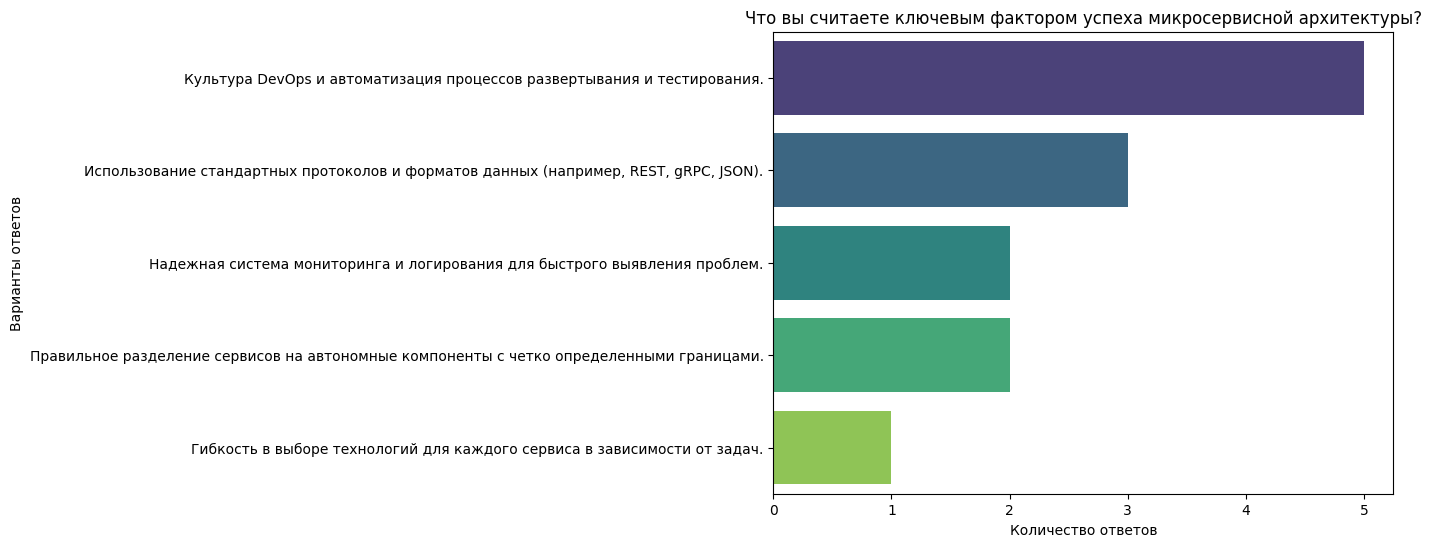

In [52]:
# Запускаем автоматический анализ
analyze_all_questions(data)